# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

Your tasks:
* Import data from the provided GitHub repo using `pandas`
* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`
* You may need to change column names to make them easier to work with
* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method

Data files to import: 
1. GDP
2. Inflation 
3. Apple stock prices 
4. Microsoft stock prices

In [175]:
# Load GDP data
gdp_df = pd.read_csv('GDP.csv')
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df.rename(columns={'DATE': 'Date'}, inplace=True)
gdp_df.head()

,Date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [176]:
# Load inflation data 
inflation_df = pd.read_csv('inflation_monthly.csv')
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])

inflation_df.rename(columns={'CORESTICKM159SFRBATL': 'INFLATION'}, inplace=True)
inflation_df.rename(columns={'DATE': 'Date'}, inplace=True)

#inflation_df.info()
inflation_df.head()

,Date,INFLATION
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [177]:
# Load the historical stock price data for Apple and Microsoft

# Load Apple stock data
aapl_df = pd.read_csv('apple_historical_data.csv')
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.rename(columns={'Close/Last': 'Close'}, inplace=True)

aapl_df.head()

,Date,Close,Volume,Open,High,Low
0,2024-05-03,$183.38,163224100,$186.65,$187.00,$182.66
1,2024-05-02,$173.03,94214920,$172.51,$173.42,$170.89
2,2024-05-01,$169.30,50383150,$169.58,$172.71,$169.11
3,2024-04-30,$170.33,65934780,$173.33,$174.99,$170.00
4,2024-04-29,$173.50,68169420,$173.37,$176.03,$173.10


In [178]:
# Load Microsoft stock data
msft_df = pd.read_csv('microsoft_historical_data.csv') 
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
msft_df.rename(columns={'Close/Last': 'Close'}, inplace=True)
msft_df.head()

,Date,Close,Volume,Open,High,Low
0,2024-05-03,$406.66,17446720,$402.28,$407.15,$401.86
1,2024-05-02,$397.84,17709360,$397.66,$399.93,$394.6515
2,2024-05-01,$394.94,23562480,$392.61,$401.7199,$390.31
3,2024-04-30,$389.33,28781370,$401.49,$402.16,$389.17
4,2024-04-29,$402.25,19582090,$405.25,$406.32,$399.19


In [179]:
# Use methods like .info() and .describe() to explore the data
# Explore GDP data
print("\nGDP Data Info:")
gdp_df.info()
print("\nGDP Data Description:")
print(gdp_df.describe())

# Explore inflation data
print("\nInflation Data Info:")
inflation_df.info() 
print("\nInflation Data Description:")
print(inflation_df.describe())

# Explore Apple stock data
print("\nApple Stock Data Info:")
aapl_df.info()
print("\nApple Stock Data Description:") 
print(aapl_df.describe())

# Explore Microsoft stock data
print("\nMicrosoft Stock Data Info:")
msft_df.info()
print("\nMicrosoft Stock Data Description:")
print(msft_df.describe())



GDP Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    309 non-null    datetime64[ns]
 1   GDP     309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB

GDP Data Description:
                                Date           GDP
count                            309    309.000000
mean   1985-07-01 11:11:04.077669888   7227.754935
min              1947-01-01 00:00:00    243.164000
25%              1966-04-01 00:00:00    804.981000
50%              1985-07-01 00:00:00   4386.773000
75%              2004-10-01 00:00:00  12527.214000
max              2024-01-01 00:00:00  28284.498000
std                              NaN   7478.297734

Inflation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype

## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [180]:
# Check for nulls 
print("\nApple Stock Data Null Check:")
print(aapl_df.isnull().sum())

print("\nMicrosoft Stock Data Null Check:")
print(msft_df.isnull().sum())

print("\nGDP Data Null Check:")
print(gdp_df.isnull().sum())

print("\nInflation Data Null Check:") 
print(inflation_df.isnull().sum())




Apple Stock Data Null Check:
Date      0
Close     3
Volume    0
Open      0
High      0
Low       0
dtype: int64

Microsoft Stock Data Null Check:
Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

GDP Data Null Check:
Date    0
GDP     0
dtype: int64

Inflation Data Null Check:
Date         0
INFLATION    0
dtype: int64


In [181]:
# Forward fill any missing data

aapl_df.ffill(inplace=True) 

In [182]:
# Check again for nulls after using forward fill
# Check for nulls after forward fill
print("\nApple Stock Data Null Check After Forward Fill:")
aapl_df.isnull().sum()



Apple Stock Data Null Check After Forward Fill:


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [183]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col] = df[col].str.replace('$', '', regex=False)
        # inplace numeric
        df[col] = pd.to_numeric(df[col])


In [184]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
convert_dollar_columns_to_numeric(aapl_df, ['Open', 'High', 'Low', 'Close'])
print(aapl_df.head())
convert_dollar_columns_to_numeric(msft_df, ['Open', 'High', 'Low', 'Close'])
print(msft_df.head())


        Date   Close     Volume    Open    High     Low
0 2024-05-03  183.38  163224100  186.65  187.00  182.66
1 2024-05-02  173.03   94214920  172.51  173.42  170.89
2 2024-05-01  169.30   50383150  169.58  172.71  169.11
3 2024-04-30  170.33   65934780  173.33  174.99  170.00
4 2024-04-29  173.50   68169420  173.37  176.03  173.10
        Date   Close    Volume    Open      High       Low
0 2024-05-03  406.66  17446720  402.28  407.1500  401.8600
1 2024-05-02  397.84  17709360  397.66  399.9300  394.6515
2 2024-05-01  394.94  23562480  392.61  401.7199  390.3100
3 2024-04-30  389.33  28781370  401.49  402.1600  389.1700
4 2024-04-29  402.25  19582090  405.25  406.3200  399.1900


In [185]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
# Convert Date columns to datetime format
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'])



In [186]:
# Use .info() and check the type of each column to ensure that the above steps worked

print("Apple stock data types:")
aapl_df.info()
print("\nMicrosoft stock data types:")
msft_df.info()
print("\nGDP data types:")
gdp_df.info() 
print("\nInflation data types:")
inflation_df.info()



Apple stock data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB

Microsoft stock data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5  

## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [187]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
inflation_df['Date'] = inflation_df['Date'] + pd.offsets.MonthEnd(0)
print(inflation_df.head())



        Date  INFLATION
0 1968-01-31   3.651861
1 1968-02-29   3.673819
2 1968-03-31   4.142164
3 1968-04-30   4.155828
4 1968-05-31   4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [188]:
# Upsample and interpolate from monthly to weekly 

# Set Date as index for resampling
inflation_df = inflation_df.set_index('Date')

# Resample to weekly frequency and interpolate
inflation_weekly_df = inflation_df.resample('W').interpolate(method='linear')

# Reset index to make Date a column again
inflation_weekly_df = inflation_weekly_df.reset_index()

print("Weekly inflation data:")
print(inflation_weekly_df.tail())


Weekly inflation data:
           Date  INFLATION
2926 2024-03-03   4.523115
2927 2024-03-10   4.519639
2928 2024-03-17   4.516164
2929 2024-03-24   4.512688
2930 2024-03-31   4.509212


In [211]:
# Downsample from monthly to quarterly 

inflation_quarterly_df = inflation_df.resample('QE').mean()

inflation_quarterly_df = inflation_quarterly_df.reset_index()

inflation_quarterly_df.head()


,Date,INFLATION
0,1968-03-31,3.822615
1,1968-06-30,4.263214
2,1968-09-30,4.882643
3,1968-12-31,5.429443
4,1969-03-31,5.873770


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [190]:
# Standardize the GDP measure
gdp_df['GDP_standardized'] = (gdp_df['GDP'] - gdp_df['GDP'].mean()) / gdp_df['GDP'].std()

print(gdp_df[['Date', 'GDP', 'GDP_standardized']].head())


        Date      GDP  GDP_standardized
0 1947-01-01  243.164         -0.933981
1 1947-04-01  245.968         -0.933606
2 1947-07-01  249.585         -0.933123
3 1947-10-01  259.745         -0.931764
4 1948-01-01  265.742         -0.930962


In [191]:
# Check the dataframe to make sure the calculation worked as expected 

print("\nStandardized GDP statistics:")
print(f"Mean: {gdp_df['GDP_standardized'].mean():.10f}")
print(f"Standard deviation: {gdp_df['GDP_standardized'].std():.10f}")




Standardized GDP statistics:
Mean: -0.0000000000
Standard deviation: 1.0000000000


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [192]:
# Get max date in timeseries

max_date = aapl_df['Date'].max()


In [193]:
# Use the max date calculated above to get the last three months of data in the dataset 
three_months_ago = max_date - pd.DateOffset(months=3)

aapl_df_3m = aapl_df[aapl_df['Date'] >= three_months_ago]

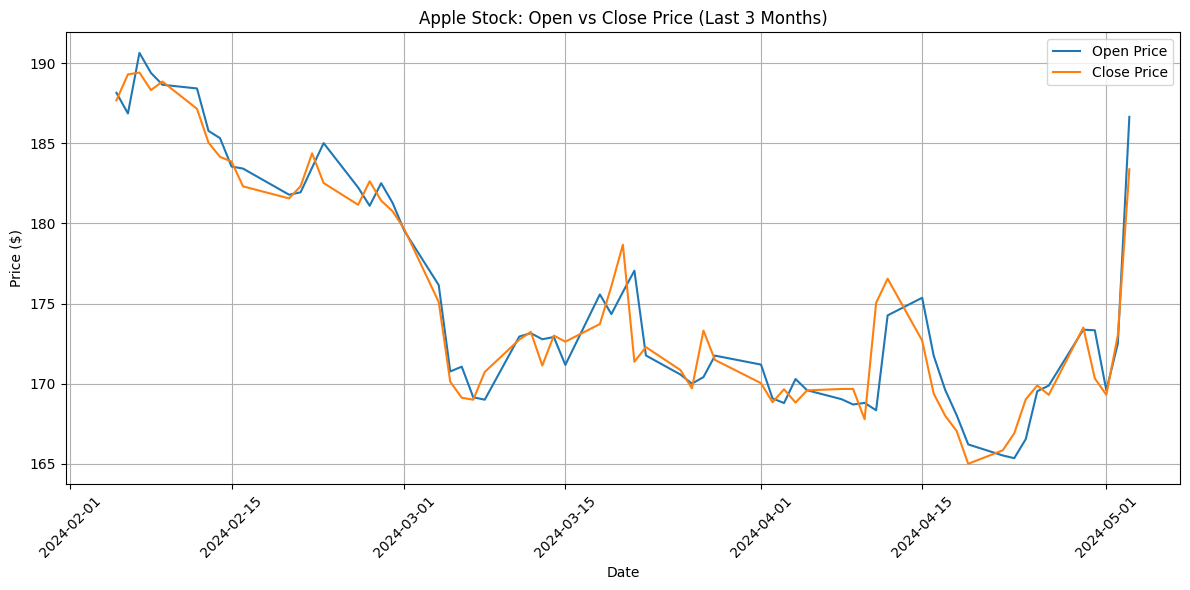

In [194]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
plt.figure(figsize=(12,6))
plt.plot(aapl_df_3m['Date'], aapl_df_3m['Open'], label='Open Price')
plt.plot(aapl_df_3m['Date'], aapl_df_3m['Close'], label='Close Price')

plt.title('Apple Stock: Open vs Close Price (Last 3 Months)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

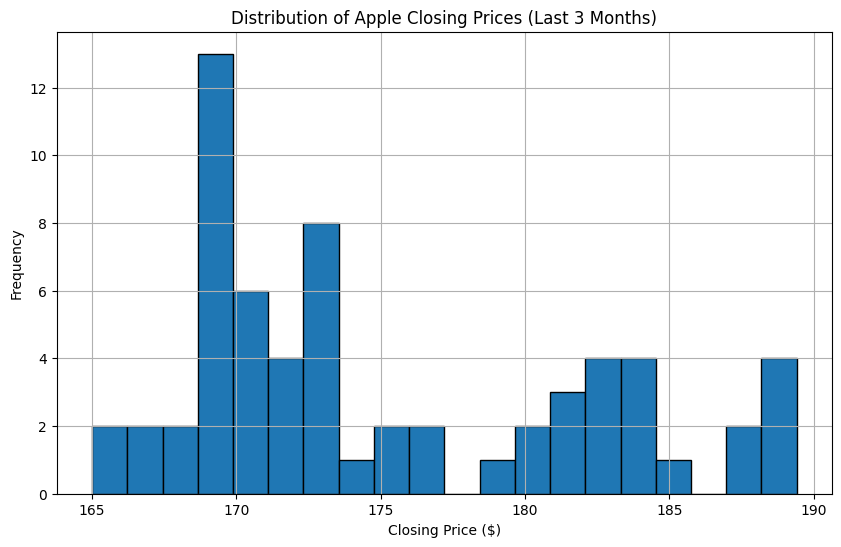

In [195]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(10,6))
plt.hist(aapl_df_3m['Close'], bins=20, edgecolor='black')
plt.title('Distribution of Apple Closing Prices (Last 3 Months)')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [196]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
aapl_returns = aapl_df['Close'].pct_change()
msft_returns = msft_df['Close'].pct_change()

inflation_change = inflation_df['INFLATION'].pct_change()


### 2. Interpolate stock returns from daily to monthly

In [197]:
# Convert daily returns to monthly by resampling and interpolating
aapl_df = aapl_df.set_index('Date')
msft_df = msft_df.set_index('Date')

aapl_returns = aapl_df['Close'].pct_change()
msft_returns = msft_df['Close'].pct_change()

aapl_returns_monthly = aapl_returns.resample('M').mean()
msft_returns_monthly = msft_returns.resample('M').mean()

aapl_returns_monthly.index = pd.to_datetime(aapl_returns_monthly.index)
msft_returns_monthly.index = pd.to_datetime(msft_returns_monthly.index)
inflation_change.index = pd.to_datetime(inflation_change.index)


/var/folders/m3/zhdght151ks0419xft82pl2h0000gq/T/ipykernel_49727/2838893418.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl_returns_monthly = aapl_returns.resample('M').mean()
/var/folders/m3/zhdght151ks0419xft82pl2h0000gq/T/ipykernel_49727/2838893418.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  msft_returns_monthly = msft_returns.resample('M').mean()


### 3. Merge the dataframes and calculate / plot the correlation

In [198]:
# Merge the dataframes
merged_df = pd.DataFrame({
    'AAPL Returns': aapl_returns_monthly,
    'MSFT Returns': msft_returns_monthly, 
    'Inflation Change': inflation_change
})

merged_df = merged_df.dropna()

### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [199]:
correlation_matrix = merged_df.corr()


### 5. Plot the correlation matrix as a heatmap 

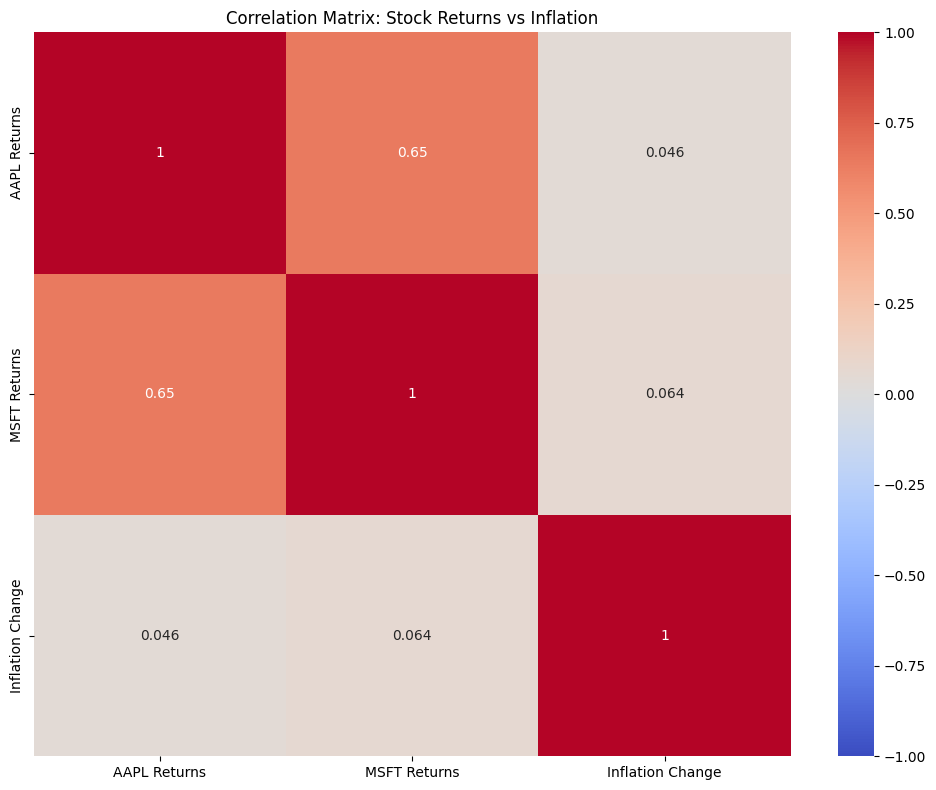

In [200]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Stock Returns vs Inflation')
plt.tight_layout()
plt.show()


## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [201]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = 7

In [202]:
# Calculate rolling one-week volatility

three_months_ago = max_date - pd.DateOffset(months=3)
aapl_recent = aapl_df[aapl_df.index.get_level_values('Date') >= three_months_ago].copy()

# Calculate rolling volatility (standard deviation)
aapl_recent['Rolling_Volatility'] = aapl_recent['Close'].rolling(window=window_size).std()


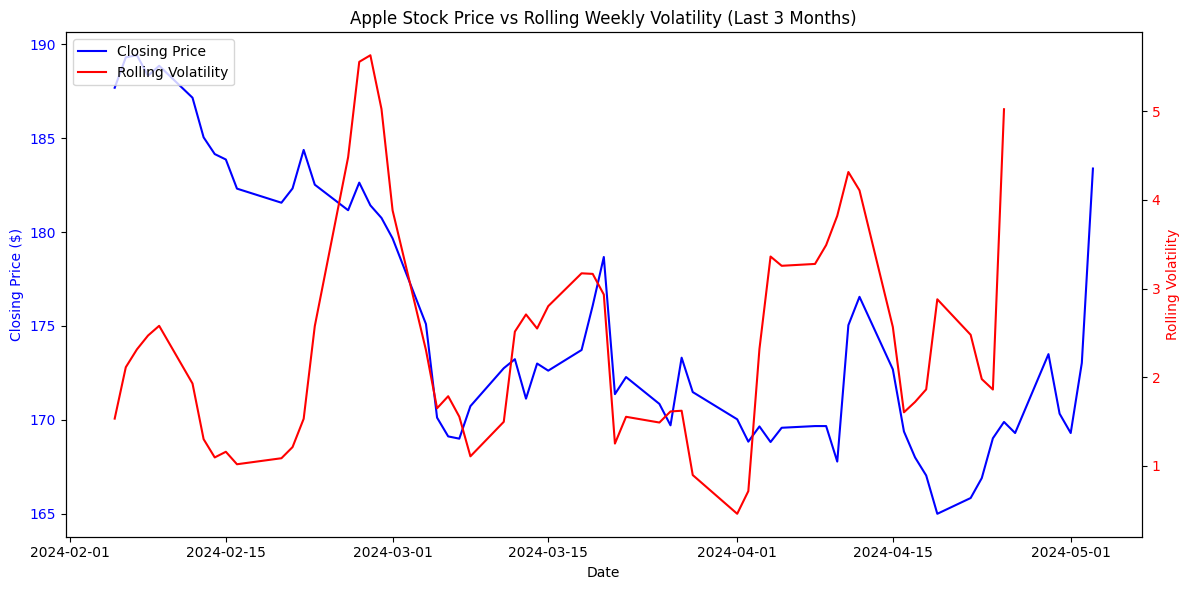

In [203]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on primary y-axis
ax1.plot(aapl_recent.index, aapl_recent['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis that shares same x-axis
ax2 = ax1.twinx()

# Plot rolling volatility on secondary y-axis 
ax2.plot(aapl_recent.index, aapl_recent['Rolling_Volatility'], color='red', label='Rolling Volatility')
ax2.set_ylabel('Rolling Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title
plt.title("Apple Stock Price vs Rolling Weekly Volatility (Last 3 Months)")

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()



## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [204]:
# Export preprocessed datasets to CSV files
gdp_df.to_csv('preprocessed_gdp.csv', index=False)
inflation_df.to_csv('preprocessed_inflation.csv', index=False)
aapl_df.to_csv('preprocessed_aapl.csv', index=False)
msft_df.to_csv('preprocessed_msft.csv', index=False)
